# TASK 6: Symmetry study

In [2]:
# Download CIF file of "mp-1022" material
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter

with MPRester("AaCuMl5yxEVFLZ8n") as m:
    # Get the information for material "mp-1022"
    structure = m.get_structure_by_material_id("mp-1022") # K2S

## To study the effect of 3 different elements of symmetry (not identity) each for one different atom

In [3]:
from pymatgen.symmetry.analyzer import * # SpacegroupAnalyzer

K2Sanalyser = SpacegroupAnalyzer(structure)
# Provides the material structure according to standards. 
# The standards are defined in Setyawan, W., & Curtarolo, S. (2010)
K2SstdStructure = K2Sanalyser.get_conventional_standard_structure()
print(K2SstdStructure)

Full Formula (K8 S4)
Reduced Formula: K2S
abc   :   7.464592   7.464592   7.464592
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  K     0.25  0.75  0.75
  1  K     0.25  0.25  0.75
  2  K     0.25  0.25  0.25
  3  K     0.25  0.75  0.25
  4  K     0.75  0.75  0.25
  5  K     0.75  0.25  0.25
  6  K     0.75  0.25  0.75
  7  K     0.75  0.75  0.75
  8  S     0     0     0
  9  S     0     0.5   0.5
 10  S     0.5   0     0.5
 11  S     0.5   0.5   0


In [4]:
# Extract atom sites in the structure
atomSite = K2SstdStructure.sites
i = 0
for s in atomSite:
    print(i,"\t",s)
    i += 1


0 	 [1.866148 5.598444 5.598444] K
1 	 [1.866148 1.866148 5.598444] K
2 	 [1.866148 1.866148 1.866148] K
3 	 [1.866148 5.598444 1.866148] K
4 	 [5.598444 5.598444 1.866148] K
5 	 [5.598444 1.866148 1.866148] K
6 	 [5.598444 1.866148 5.598444] K
7 	 [5.598444 5.598444 5.598444] K
8 	 [0. 0. 0.] S
9 	 [6.00198973e-16 3.73229600e+00 3.73229600e+00] S
10 	 [3.732296 0.       3.732296] S
11 	 [3.73229600e+00 3.73229600e+00 4.57074435e-16] S


In [5]:
# Extract the list of symmetry operations for the molecule K2S
from pymatgen.core.operations import SymmOp
symmetryOp = K2Sanalyser.get_symmetry_operations()

i = 0
for s in symmetryOp:
    # Return a string x, y, z for rotation matrix
    print("\n", i,")", " symmetry operations: \t", s.as_xyz_string())
    print(s)
    
    #validOp = is_valid_op(s)
    #print(validOp)
    i += 1



 0 )  symmetry operations: 	 x, y, z
Rot:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.]

 1 )  symmetry operations: 	 -x, -y, -z
Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

 2 )  symmetry operations: 	 x+y+z, -z, -x
Rot:
[[ 1.  1.  1.]
 [ 0.  0. -1.]
 [-1.  0.  0.]]
tau
[0. 0. 0.]

 3 )  symmetry operations: 	 -x-y-z, z, x
Rot:
[[-1. -1. -1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]]
tau
[0. 0. 0.]

 4 )  symmetry operations: 	 y, x, -x-y-z
Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [-1. -1. -1.]]
tau
[0. 0. 0.]

 5 )  symmetry operations: 	 -y, -x, x+y+z
Rot:
[[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 1.  1.  1.]]
tau
[0. 0. 0.]

 6 )  symmetry operations: 	 -z, x+y+z, -y
Rot:
[[ 0.  0. -1.]
 [ 1.  1.  1.]
 [ 0. -1.  0.]]
tau
[0. 0. 0.]

 7 )  symmetry operations: 	 z, -x-y-z, y
Rot:
[[ 0.  0.  1.]
 [-1. -1. -1.]
 [ 0.  1.  0.]]
tau
[0. 0. 0.]

 8 )  symmetry operations: 	 -x-y-z, z, y
Rot:
[[-1. -1. -1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
tau
[0. 0. 0.]

 9 )  symmetry operations: 	 x+

### 1) First simmetry operation on a S atom

In [9]:
# Coordinates before symmetry operation
# S Atom selection
SxyzP0 = atomSite[9]
print("Starting coordinates:\t", SxyzP0)

# Rotational matrix selection
simmetryOp1 = symmetryOp[11]

print("\nThe selected rotation matrix is:\n", simmetryOp1.rotation_matrix)

print("\nSymmetry operations selected:\t", simmetryOp1.as_xyz_string())

print("\nTranslation vector:\t", simmetryOp1.translation_vector)

print("\nFinal coordinates:\t", simmetryOp1.operate([6.00198973e-16, 3.73229600e+00, 3.73229600e+00]))

Starting coordinates:	 [6.00198973e-16 3.73229600e+00 3.73229600e+00] S

The selected rotation matrix is:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

Symmetry operations selected:	 y, x, z

Translation vector:	 [0. 0. 0.]

Final coordinates:	 [3.73229600e+00 6.00198973e-16 3.73229600e+00]


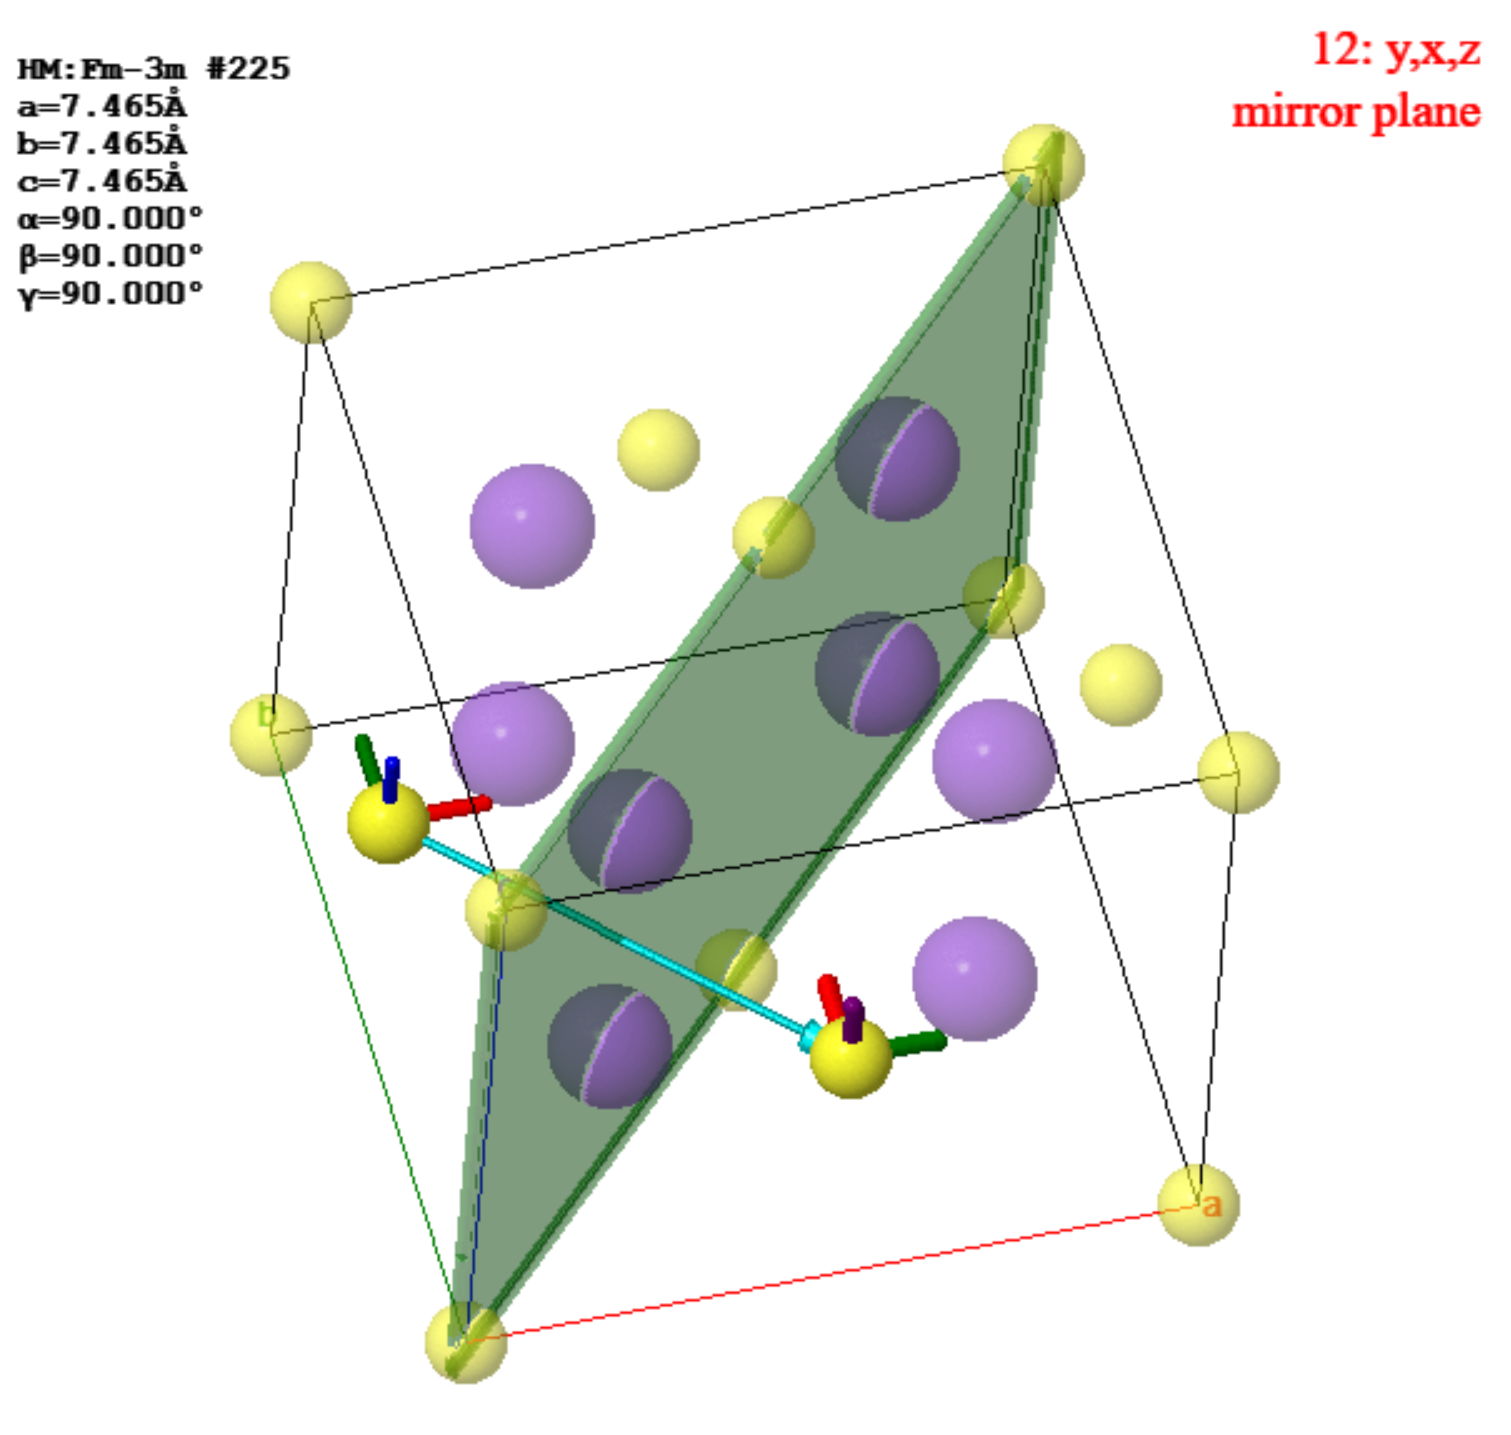

### 2) Second symmetry operation on a K atom

In [12]:
# Coordinates before symmetry operation
# K Atom selection
KxyzP0 = atomSite[0]
print("Starting coordinates:\t", KxyzP0)

# Rotational matrix selection
simmetryOp2 = symmetryOp[32]
print("\nThe selected rotation matrix is:\n", simmetryOp2.rotation_matrix)
print("\nSymmetry operations selected:\t", simmetryOp2.as_xyz_string())
print("\nTranslation vector:\t", simmetryOp2.translation_vector)

print("\nFinal coordinates:\t", simmetryOp2.operate([1.866148, 5.598444, 5.598444]))

Starting coordinates:	 [1.866148 5.598444 5.598444] K

The selected rotation matrix is:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Symmetry operations selected:	 y, z, x

Translation vector:	 [0. 0. 0.]

Final coordinates:	 [5.598444 5.598444 1.866148]


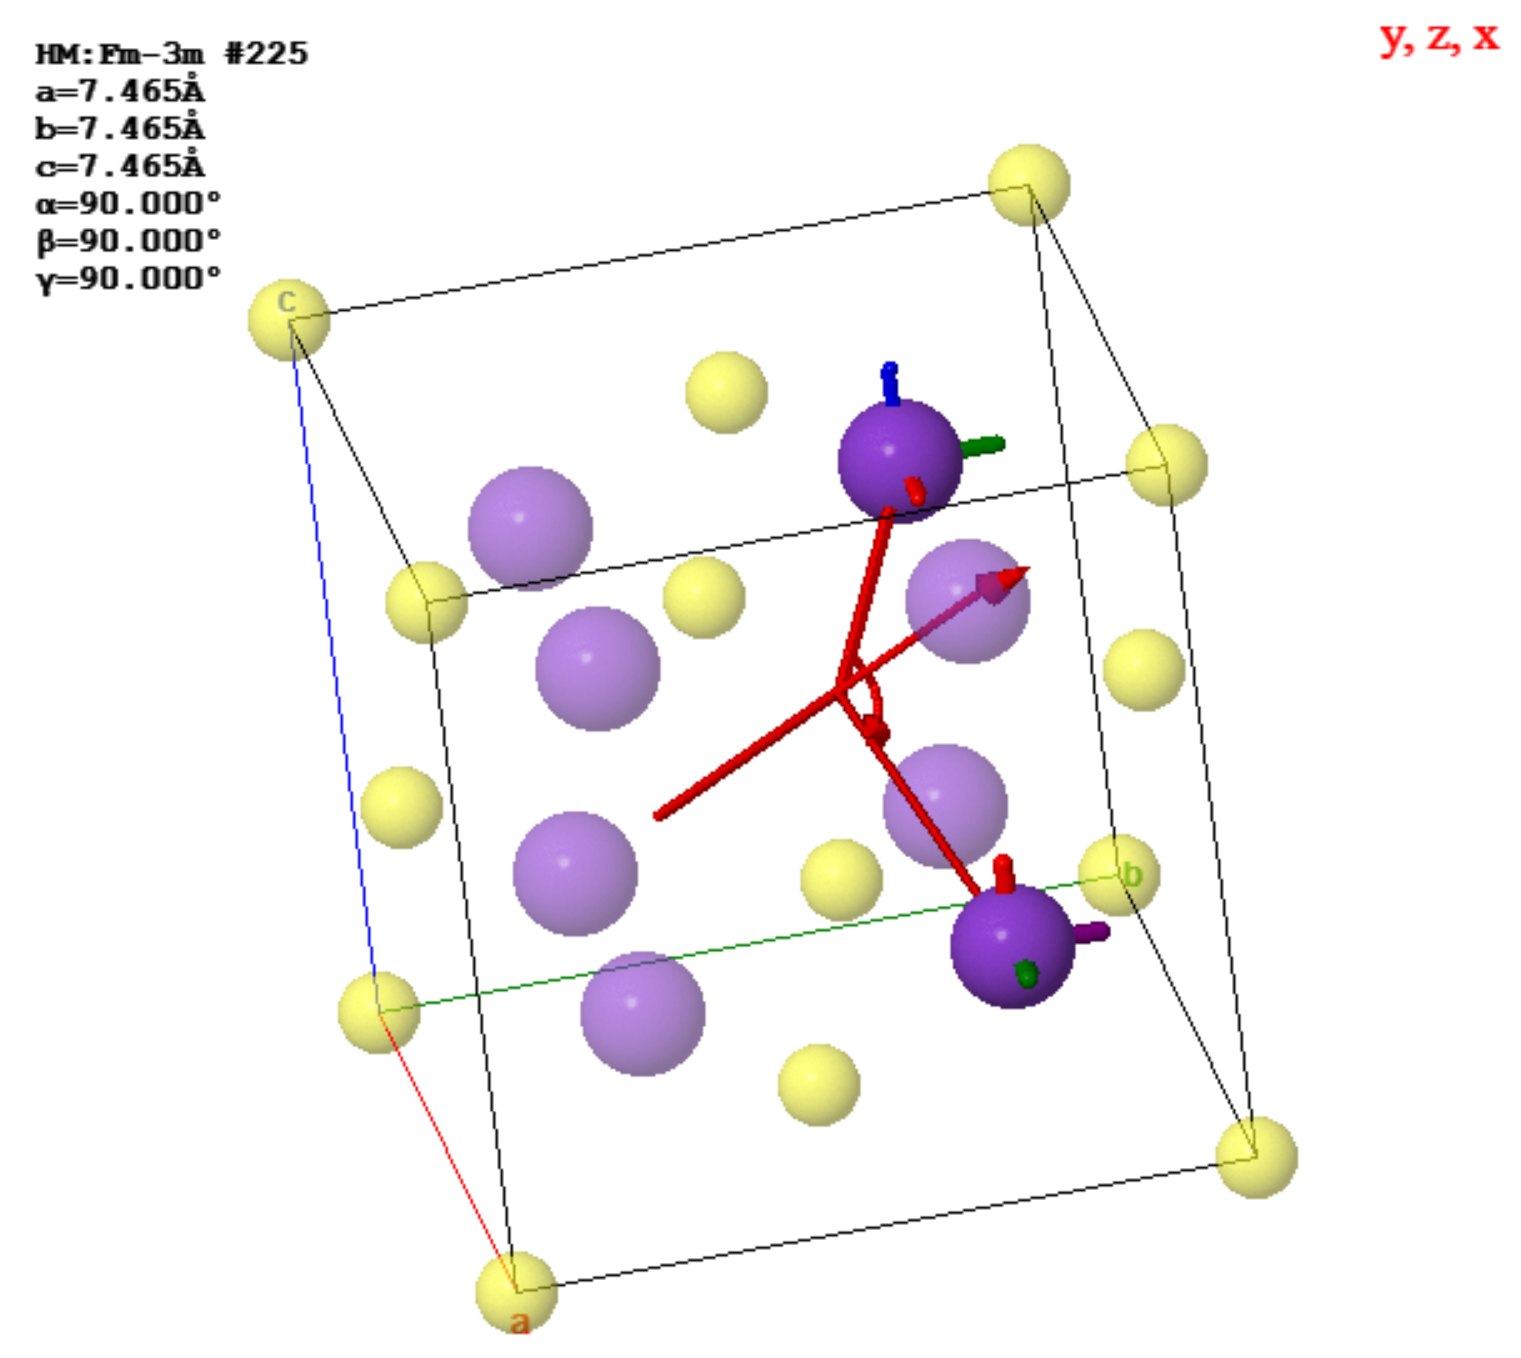

### 3) Third symmetry operation on another K atom

In [13]:
# Coordinates before symmetry operation
# K Atom selection
KxyzP0 = atomSite[1]
print("Starting coordinates:\t", KxyzP0)

# Rotational matrix assignement: '-x, y+1/2, z+1/2'
# The operation is a "n-glide plan" (see "https://en.wikipedia.org/wiki/Glide_plane")
simmetryOp3 = SymmOp.from_xyz_string('-x, y+1/2, z+1/2')

print("\nThe selected rotation matrix is:\n", simmetryOp3.rotation_matrix)

print("\nSymmetry operations selected (n-glide plan):\t", simmetryOp3.as_xyz_string())
print("Note: in crystallography, a glide plane (or transflection) is a symmetry operation")
print("describing how a reflection in a plane, followed by a translation parallel with that")
print("plane, may leave the crystal unchanged")


print("\nTranslation vector:\t", simmetryOp3.translation_vector)

print("\nFinal coordinates:\t", simmetryOp3.operate([1.866148, 1.866148, 5.598444]))

Starting coordinates:	 [1.866148 1.866148 5.598444] K

The selected rotation matrix is:
 [[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]

Symmetry operations selected (n-glide plan):	 -x, y+1/2, z+1/2
Note: in crystallography, a glide plane (or transflection) is a symmetry operation
describing how a reflection in a plane, followed by a translation parallel with that
plane, may leave the crystal unchanged

Translation vector:	 [0.  0.5 0.5]

Final coordinates:	 [-1.866148  2.366148  6.098444]


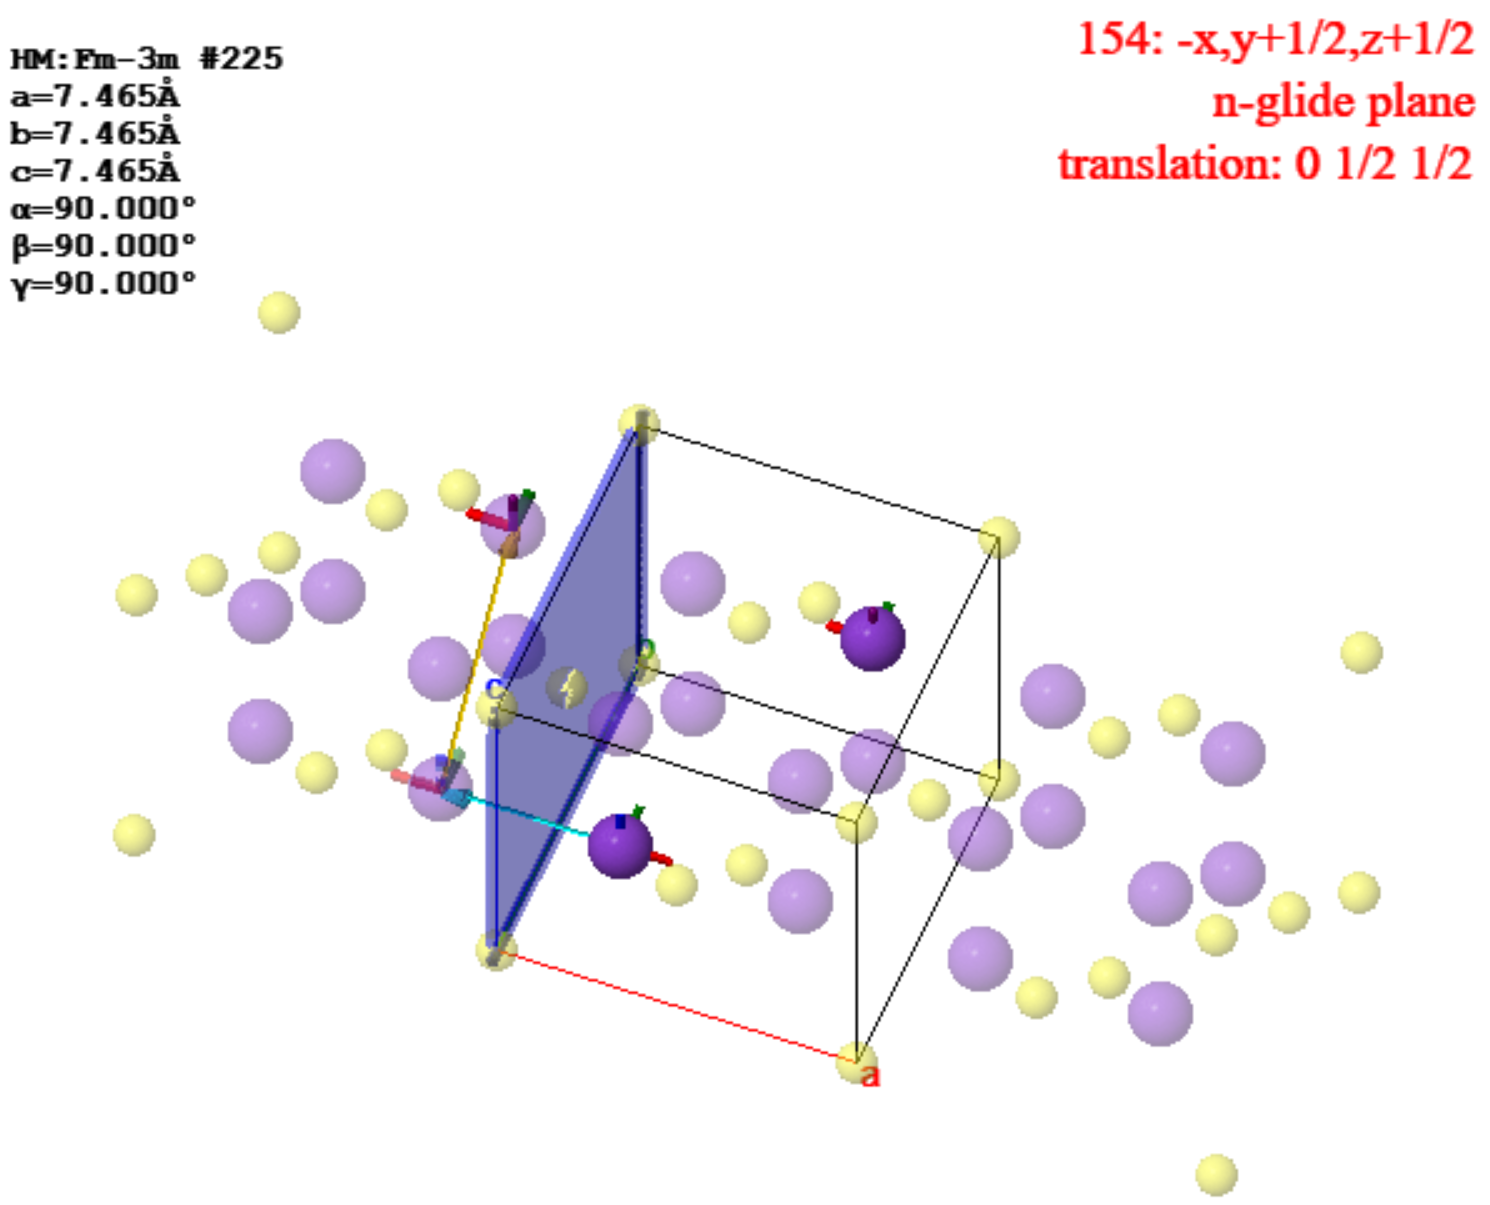